In [22]:
import pandas as pd
import numpy as np
import os

import warnings 
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# 전체 열 출력 허용
pd.set_option('display.max_columns', None)

# 전체 행 출력 허용
pd.set_option('display.max_rows', None)

# 한 셀 내 텍스트 길이 제한 해제
pd.set_option('display.max_colwidth', None)

In [9]:
# 기본 설정으로 되돌리기
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
pd.reset_option('display.max_colwidth')

In [23]:
df = pd.read_csv('m_data.csv', encoding='CP949')
df.head(1)

,주문번호,배송완료일,배송시작일,구매일,구매시월령,고객번호,구매금액,결제금액,물품대분류,상품명,...,최근3개월구매금액,고객등급,등급별혜택_상품쿠폰,등급별혜택_쇼핑지원금,등급별혜택_무료배송쿠폰,이탈등급,당일출고서비스유무,배송시작일_year,배송시작일_month,배송시작일_day
0,901011864201303,2022-01-06,2022-01-02,2022-01-01,35.0,201901010750089,74560.0,43825.0,팬티,매직핏팬티 팬티형,...,43825.0,골드,15%쿠폰1장,2천원 1장,배송비 무료 2회,이탈,당일출고 서비스 시작 전,2022,1,2


In [27]:
mq = pd.read_excel('./news/맘큐뉴스.xlsx')
use_cols = ['일자','키워드','특성추출(가중치순 상위 50개)', '본문','URL']
mq = mq[use_cols]
mq['일자'] = pd.to_datetime(mq['일자'], format='%Y%m%d')

df['쿠폰적가'] = np.where(df['상품명'].str.contains('쿠폰'), '1',0)
df['상품명'] = df['상품명'].str.replace('쿠폰적가','', regex=True)
df['상품명'] = df['상품명'].str.replace('쿠폰','', regex=True)

In [28]:
display(mq.head(2))

,일자,키워드,특성추출(가중치순 상위 50개),본문,URL
0,2022-11-07,"38년,지속,지속가능성,비결,리딩,기업,미래,전략,유한킴벌리,유한킴벌리,유한양행,미...","유한킴벌리,esg,위원회,다양성,소위원회,ceo,지속가능,사무국,소비자,유한양행,경...",[리딩 기업의 미래 전략] 유한킴벌리 \n \n \n \n유한킴벌리는 1970년 유...,https://www.hankyung.com/article/202210315002i
1,2022-10-13,"유한킴벌리,하기스,기부,기저귀,누적,1000만,유한킴벌리,기저귀,자사,하기스,누적,...","유한킴벌리,하기스,신생아,른둥이,희망뱅크,그간,네이처메이드,1000만,굿액션,코튼,...",유한킴벌리는 자사 하기스 기저귀의 누적 기부량이 1000만매를 넘어섰다고 13일 밝...,http://news.mk.co.kr/newsRead.php?no=906279&ye...


In [29]:
mq['일자'].drop_duplicates()

0    2022-11-07
1    2022-10-13
3    2022-09-21
19   2022-09-08
22   2022-08-19
25   2022-08-07
26   2022-08-05
30   2022-05-16
32   2022-04-20
36   2022-04-07
38   2022-03-17
39   2023-06-14
41   2023-06-13
46   2023-05-14
47   2023-05-12
49   2023-04-13
50   2023-04-07
52   2023-04-05
56   2023-03-14
58   2023-02-28
Name: 일자, dtype: datetime64[ns]

In [87]:
기저귀_일자 = mq[mq['키워드'].str.contains('기저귀')][['일자','특성추출(가중치순 상위 50개)']]

기저귀_일자= 기저귀_일자.reset_index()
기저귀_일자.head(1)

,index,일자,특성추출(가중치순 상위 50개)
0,0,2022-11-07,"유한킴벌리,esg,위원회,다양성,소위원회,ceo,지속가능,사무국,소비자,유한양행,경..."


In [88]:
일자별매출_기저귀 = df[(df['물품대분류']=='팬티')|(df['물품대분류']=='기저귀')].groupby(['구매일'])['결제금액'].sum()
일자별매출_기저귀.head()

구매일
2022-01-01    947810.0
2022-01-02    841274.0
2022-01-03    909594.0
2022-01-04    437598.0
2022-01-05    757798.0
Name: 결제금액, dtype: float64

In [89]:
기저귀_일자 = 기저귀_일자[['일자','특성추출(가중치순 상위 50개)']]
기저귀_일자['기사']=1
기저귀_일자.columns=['구매일','특성추출(상위50개)','기사']
기저귀_일자.head(1)

,구매일,특성추출(상위50개),기사
0,2022-11-07,"유한킴벌리,esg,위원회,다양성,소위원회,ceo,지속가능,사무국,소비자,유한양행,경...",1


In [90]:
일자별매출_기저귀 = pd.DataFrame(일자별매출_기저귀).reset_index()
일자별매출_기저귀['구매일'] = 일자별매출_기저귀['구매일'].astype(str)
기저귀_일자['구매일'] = 기저귀_일자['구매일'].astype(str)

기저귀기사 = pd.merge(일자별매출_기저귀, 기저귀_일자, on='구매일', how='left')
기저귀기사 = 기저귀기사.fillna(0)
기저귀_일자.head(1)

,구매일,특성추출(상위50개),기사
0,2022-11-07,"유한킴벌리,esg,위원회,다양성,소위원회,ceo,지속가능,사무국,소비자,유한양행,경...",1


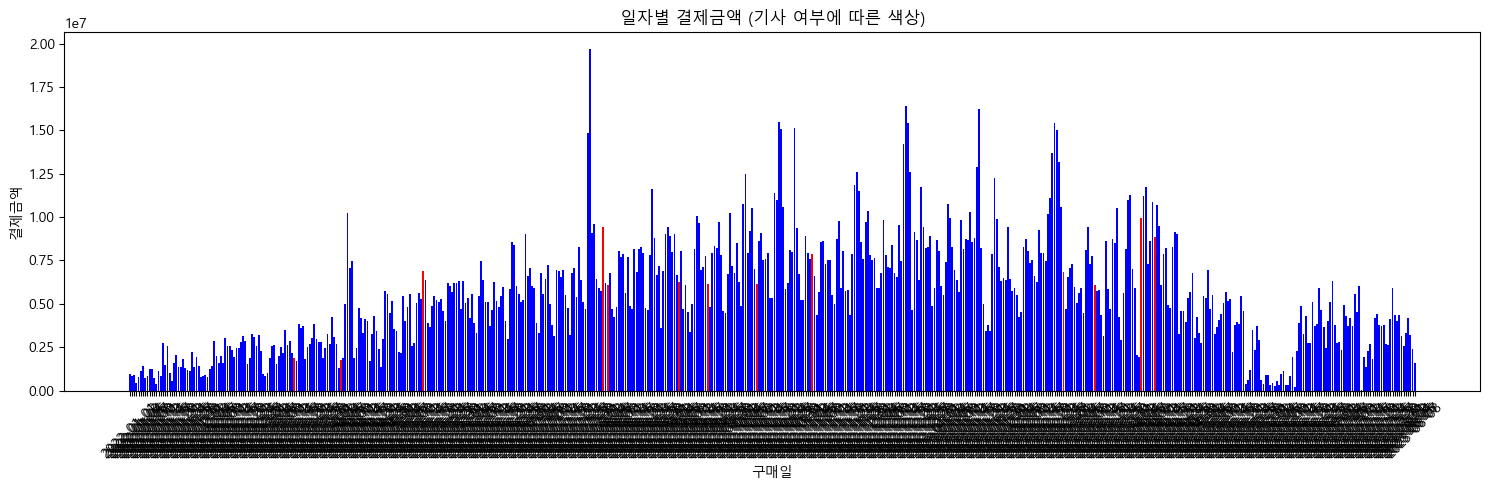

In [91]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'

# 1. 색상 조건부 리스트 생성
colors = ['red' if v == 1 else 'blue' for v in 기저귀기사['기사']]

# 2. 그래프 출력
plt.figure(figsize=(15, 5))
plt.bar(기저귀기사['구매일'], 기저귀기사['결제금액'], color=colors)
plt.title('일자별 결제금액 (기사 여부에 따른 색상)')
plt.xlabel('구매일')
plt.ylabel('결제금액')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [102]:
filtered = 기저귀기사[기저귀기사['기사'] == 1].drop_duplicates()
filtered
매출상승한_날짜 = filtered.loc[:, ['구매일','특성추출(상위50개)']]
매출상승한_날짜

,구매일,특성추출(상위50개)
74,2022-03-17,"신제품,하기스,안커버,코튼,소비자,유한킴벌리,맘큐,자사몰,기후변화,지구환경,원산지,..."
95,2022-04-07,"하기스,재활용,유한킴벌리,포장재,테라사이클,참여자,쓰담,지구환경,코튼,지속가능,오가..."
96,2022-04-07,"하기스,포장재,비닐포장재,재활용,유한킴벌리,테라사이클,참여자,오세은,오가닉코튼커버,..."
133,2022-05-16,"아이배냇,2종,출산선물세트,3종,하기스,맘큐,배냇,관계자,아이오감,자사몰,네이처메이..."
214,2022-08-05,"키엘,팀버랜드,스킨케어,가민,소비자,프로폴리스,추출물,신제품,온라인,파리바게뜨,매운..."
215,2022-08-05,"하기스,소비자,맘큐,유한킴벌리,대소변,피팅룸,이영기,론칭,자사몰,재판매,몸무게,제조..."
216,2022-08-05,"하기스,소비자,맘큐,유한킴벌리,대소변,피팅룸,지구환경,런칭,코튼,오가닉,바이오매스,..."
217,2022-08-05,"하기스,맘큐,피팅룸,소비자,유한킴벌리,오세은,아시아투데이,자사몰,몸무게,월령,그동안..."
219,2022-08-07,"맘큐,유한킴벌리,하기스,소비자,피팅룸,유한킴벌리몰,몸무게,월령,아기들,최소화,빅데이..."
251,2022-09-08,"하기스,신생아집중치료실,른둥이,신생아,이른둥이,치료실,유한킴벌리,판테놀,바이오매스,..."


In [108]:
매출상승한_날짜['구매일'] = pd.to_datetime(매출상승한_날짜['구매일'])

# 구매일도 datetime 형식이어야 함
기저귀기사['구매일'] = pd.to_datetime(기저귀기사['구매일'])

In [114]:
from datetime import timedelta

result = []

for 기준일 in 매출상승한_날짜['구매일']:
    # 1일 비교
    전일 = 기저귀기사[(기저귀기사['구매일'] >= 기준일 - timedelta(days=1)) & 
                     (기저귀기사['구매일'] < 기준일)]
    후일 = 기저귀기사[(기저귀기사['구매일'] > 기준일) & 
                     (기저귀기사['구매일'] <= 기준일 + timedelta(days=1))]
    
    # 1일 비교
    전주 = 기저귀기사[(기저귀기사['구매일'] >= 기준일 - timedelta(days=7)) & 
                     (기저귀기사['구매일'] < 기준일)]
    후주 = 기저귀기사[(기저귀기사['구매일'] > 기준일) & 
                     (기저귀기사['구매일'] <= 기준일 + timedelta(days=7))]

    # 1개월 비교
    전월 = 기저귀기사[(기저귀기사['구매일'] >= 기준일 - timedelta(days=30)) & 
                     (기저귀기사['구매일'] < 기준일)]
    후월 = 기저귀기사[(기저귀기사['구매일'] > 기준일) & 
                     (기저귀기사['구매일'] <= 기준일 + timedelta(days=30))]

    result.append({
        '기준일': 기준일.date(),
        '전일대비후일_매출diff': 후일['결제금액'].sum() - 전일['결제금액'].sum(),
        '전주대비후주_매출': 후주['결제금액'].sum() - 전주['결제금액'].sum(),
        '전월대비후월_매출': 후월['결제금액'].sum() - 전월['결제금액'].sum(),
        '기사내용': 매출상승한_날짜[매출상승한_날짜['구매일']==기준일]['특성추출(상위50개)']
    })

# 데이터프레임으로 변환
df_매출비교 = pd.DataFrame(result)
df_매출비교 = df_매출비교.drop_duplicates(subset='기준일', keep='first')

In [137]:
df_매출비교['기준일'] = pd.to_datetime(df_매출비교['기준일'])

In [143]:
import numpy as np

# 1. 조건 목록
# 1. 조건 목록 (datetime으로 변환)
conditions = [
    df_매출비교['기준일'] == pd.to_datetime('2022-03-17'),
    df_매출비교['기준일'] == pd.to_datetime('2022-10-13'),
    df_매출비교['기준일'] == pd.to_datetime('2022-04-07'),
    df_매출비교['기준일'] == pd.to_datetime('2022-09-08'),
    df_매출비교['기준일'] == pd.to_datetime('2022-09-21'),
    df_매출비교['기준일'] == pd.to_datetime('2023-04-07'),
    df_매출비교['기준일'] == pd.to_datetime('2023-04-13'),
]


# 2. 각 조건에 대응하는 기사 제목
values = [
    '친환경 오가닉 기저귀 출시',
    '기저귀의 누적 기부량',
    '비닐포장재 재활용 캠페인',
    '이른둥이용 초소형 기저귀 누적 기부 400판매',
    '우주패스',
    '썸머 기저귀·물티슈',
    '맥스드라이 출시'
]

# 3. 새로운 컬럼 추가
df_매출비교['기사제목'] = np.select(conditions, values, default=np.nan)

In [144]:
df_매출비교

,기준일,전일대비후일_매출diff,전주대비후주_매출,전월대비후월_매출,기사제목
0,2022-03-17,-457200.0,2056267.0,37628528.0,친환경 오가닉 기저귀 출시
1,2022-04-07,610692.0,16287704.0,32826898.0,비닐포장재 재활용 캠페인
2,2022-09-08,1356638.0,-18103202.0,65749259.0,이른둥이용 초소형 기저귀 누적 기부 400판매
3,2022-09-21,-2918893.0,-3263986.0,9956277.0,우주패스
4,2022-10-13,1623739.0,-11256809.0,-38791326.0,기저귀의 누적 기부량
5,2023-04-07,9256563.0,21951521.0,21061077.0,썸머 기저귀·물티슈
6,2023-04-13,-175031.0,-19574281.0,-38577578.0,맥스드라이 출시
